<Axes: xlabel='label', ylabel='count'>

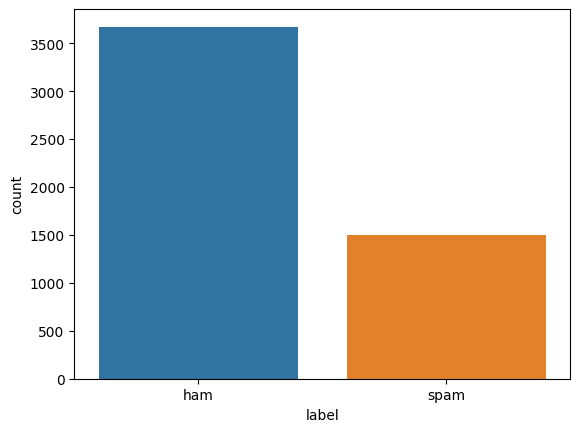

In [2]:
# The first few lines import the necessary libraries for data manipulation, visualization, and machine learning modeling.

# The pd.read_csv() function is used to load the dataset into a pandas DataFrame object called df.

# The df.drop_duplicates(inplace=True) line drops any duplicate rows in the dataset, with the inplace=True argument meaning the changes are made to the original DataFrame.

# The df.dropna(inplace=True) line drops any rows with missing values (i.e., NaNs), with the inplace=True argument meaning the changes are made to the original DataFrame.

# The df["label_num"] = df["label"].map({"ham": 0, "spam": 1}) line creates a new column called label_num in the DataFrame, which maps the values of the original label column to numerical values (0 for "ham" and 1 for "spam").

# The sns.countplot(x="label", data=df) line creates a bar plot of the distribution of the label column in the DataFrame, showing the number of "ham" and "spam" messages. The x="label" argument specifies that the label column should be used as the x-axis variable, and the data=df argument specifies the DataFrame to use.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("spam_ham_dataset.csv")

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Convert the label column to numerical values (0 for ham, 1 for spam)
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

# Visualize the distribution of labels
sns.countplot(x="label", data=df)



In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label_num"], test_size=0.2, random_state=42)

# Text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize the text
    tokens = re.split("\W+", text)
    # Remove stopwords
    text = [word for word in tokens if word not in stopwords]
    # Join the text back into a string
    text = " ".join(text)
    return text

# Define the stopwords
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

# Apply text preprocessing to the training and testing sets
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Feature engineering using CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), min_df=5)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Feature engineering using TF-IDF Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# The first line creates a new instance of the MultinomialNB class, which is a machine learning model for text classification.

# The nb_cv.fit(X_train_cv, y_train) line trains the nb_cv model on the training data, where X_train_cv is the training set of text data converted to a matrix of token counts using the CountVectorizer method, and y_train is the corresponding training set of labels (i.e., "ham" or "spam").

# The y_pred_cv = nb_cv.predict(X_test_cv) line uses the trained model to predict the labels for the test set of text data, where X_test_cv is the test set of text data converted to a matrix of token counts using the same CountVectorizer method as the training set.

# The next four lines compute various evaluation metrics for the model's performance on the test set: accuracy_cv is the accuracy score, precision_cv is the precision score, recall_cv is the recall score, and f1_cv is the F1 score. These metrics provide different measures of the model's performance, such as how many of the predicted spam messages were actually spam (precision), how many of the actual spam messages were correctly identified (recall), and the balance between precision and recall (F1 score).

# The last two lines print the evaluation metrics for the model using the print() function, which displays the output to the console. The first line prints the model name and the second line prints the evaluation metrics themselves.

# Train and evaluate a Multinomial Naive Bayes classifier with CountVectorizer
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv, y_train)
y_pred_cv = nb_cv.predict(X_test_cv)
accuracy_cv = accuracy_score(y_test, y_pred_cv)
precision_cv = precision_score(y_test, y_pred_cv)
recall_cv = recall_score(y_test, y_pred_cv)
f1_cv = f1_score(y_test, y_pred_cv)
print("Multinomial Naive Bayes with CountVectorizer:")
print("Accuracy:", accuracy_cv)
print("Precision:", precision_cv)
print("Recall:", recall_cv)
print("F1 Score:", f1_cv)

Multinomial Naive Bayes with CountVectorizer:
Accuracy: 0.9584541062801932
Precision: 0.9006410256410257
Recall: 0.9590443686006825
F1 Score: 0.9289256198347107
